### 最尤推定

(25000,)


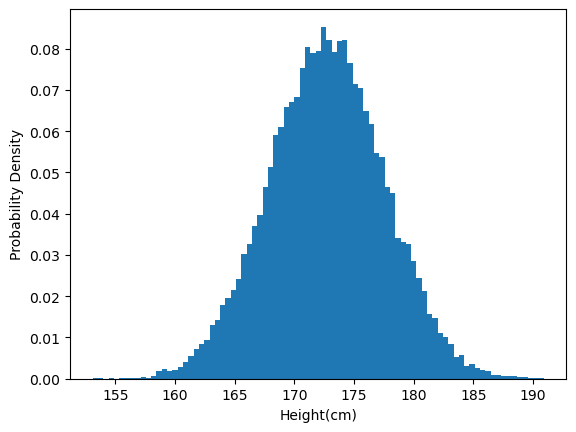

In [3]:
# 身長データセットのヒストグラムを描画する
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
xs = np.loadtxt(path)
print(xs.shape)

plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

やること

 １.モデル化  
 
 上の得られたサンプルはある確率分布から得られたと考える

２.パラメータ推定

「当てはまりの良さ」を表す統計量を最大にするようなパラメータを探す（最尤推定）


まず、このサンプル平均とサンプルの標準偏差をもとめてみる。（正規分布と仮定）

In [5]:
# xsは25,000個の身長データを持つ1次元配列
mu = np.mean(xs)
sigma = np.std(xs)

print(f'mu: {mu}, sigma: {sigma}')

mu: 172.70250853667997, sigma: 4.830167473396299


それぞれのこの値がサンプルの分布に最もフィットするパラメータ

この値を使って、正規分布を作ってみる

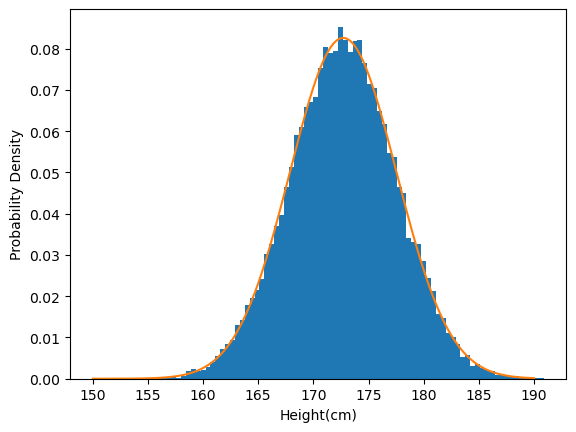

In [6]:
# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# plot
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

このモデルを用いて、新しいデータを生成できる

In [8]:
from matplotlib import scale
np.random.normal(loc=0.0, scale=1.0, size=None)

sample = np.random.normal(mu,sigma)
print(sample)

170.5326890688467


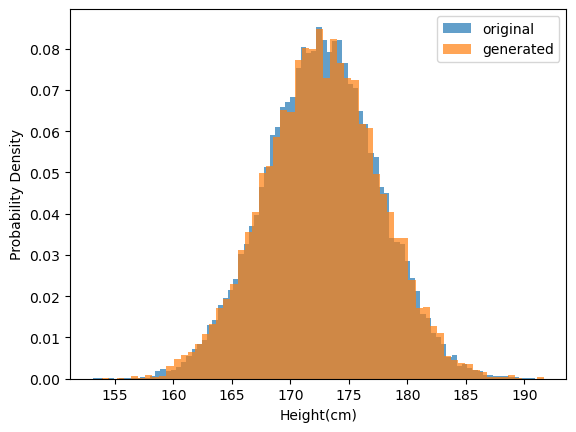

In [9]:
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

モデルを仮定→データからモデルを学習→モデルを使ってデータ生成

を行った。